In [2]:
from cnnface.stimulus.Image_process import img_similarity,nor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [ ]:
baseimg = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray/frame001.png'))
imgs_name = os.listdir(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray')
imgs_path = [os.path.join(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray',name) for name in imgs_name]
imgs = [np.array(Image.open(path)) for path in imgs_path]
similarity = [img_similarity(baseimg, img, 'SSIM') for img in imgs]

sns.set_style('darkgrid')
bins = np.arange(0,101,1)
sns.lineplot(x=bins,y=similarity)
plt.show()

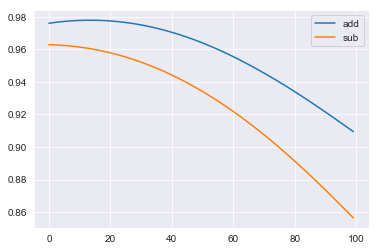

In [3]:
from cnnface.analysis.generate_ci import generateCI
sns.set_style('darkgrid')
female = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/female_average_face_gray_512.jpg').convert('L'))
male = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/male_average_face_gray_512.jpg').convert('L'))

bi = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/frame054_gray_512.jpg')).astype('int64')
para_ci = np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\meta_data/paras_ci.npy')
ci = generateCI(para_ci)
scales = np.arange(0,100,1)

bi_add = [bi+ci*scale for scale in scales]
bi_sub = [bi-ci*scale for scale in scales]

simis_add = []
simis_sub = []
for i,_ in enumerate(bi_add):
    b_add = bi_add[i]
    b_add[b_add>255] = 255
    b_add[b_add<0] = 0
    
    
    b_sub = bi_sub[i] 
    b_sub[b_sub>255] = 255
    b_sub[b_sub<0] = 0
    
    addimg = Image.fromarray(nor(b_add)*200).convert('L')
    subimg = Image.fromarray(nor(b_sub)*200).convert('L')
    
    addimg.save(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_scale_ci/morescale//add/ci_add_%04d.jpg' %i)
    subimg.save(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_scale_ci/morescale/sub/ci_sub_%04d.jpg' %i)
    
    simi_add = img_similarity(female,b_add,'pearson')
    simi_sub = img_similarity(male, b_sub, 'pearson')
    
    simis_add.append(simi_add)
    simis_sub.append(simi_sub)
    
scales = np.tile(scales,(2,))
simis = simis_add + simis_sub
add  =  ['add'] * 100
sub =  ['sub'] * 100
hue = add + sub
sns.lineplot(scales,simis,hue=hue)

In [45]:
barfsas = np.array(simis_add)
print(np.argwhere(barfsas==barfsas.max()))

[[13]]


Plot Manhattan map of distance which measure the distance of two distributions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
# load data 
params_5000 = np.load('D:\cnnface/female_male_test_51_addnoise\Face_template\meta_data/params_5000.npy')
label_f = np.loadtxt('D:\cnnface/female_male_test_51_addnoise/label_sinusoid_f.txt').astype('int64')
label_m = np.loadtxt('D:\cnnface/female_male_test_51_addnoise/label_sinusoid_m.txt').astype('int64')

# Calculate the distance of two distributions
# distance can be t-Statistic , KL divergence, Js divergence, Wasserstein distance
dis_sum = [] 
for i in range(4092):
    x_5000 = params_5000[:,i]
    x_f = x_5000[label_f]
    x_m = x_5000[label_m]
    
    # dis = stats.ttest_ind(x_f,x_m)    
    
    d = lambda x1,x2: (x1.mean() - x2.mean()) / np.sqrt(((np.std(x1))**2 + (np.std(x2))**2)/2)
    dis = np.abs(d(x_f,x_m))

    dis_sum.append(dis)
    

dis_sum = np.array(dis_sum)

scale2 = ['scale2'] * 12
scale4 = ['scale4'] * 48
scale8 = ['scale8'] * 192
scale16 = ['scale16'] * 768
scale32 = ['scale32'] * 3072
scale = scale2 + scale4 + scale8 + scale16 + scale32


# plot the manhattan map
snsplt =sns.swarmplot(x=scale,y=dis_sum)
plt.tick_params(labelsize=12)
# plot the significant line
bin = np.arange(0,5)
y = np.full((5,),dis_sum[2216])
snsplt = sns.lineplot(x=bin,y=y)

fig =snsplt.get_figure()
fig.savefig('D:\cnnface/female_male_test_51_addnoise\Face_template\CI_analysis/Manhatannx_cohensd.jpg')
plt.show()


In [5]:
print(ci.max()*34)
print(ci.min()*34)

46.55512921059445
-61.8623196923683


In [ ]:
'将ci分成五个空间频率水平加到base face上，检测网络对五个水平的判断概率'

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

act = np.squeeze(np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_level_CI/34_act.npy'))
label = np.squeeze(np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_level_CI/34_label.npy'))
label_prob = np.squeeze(np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_level_CI/34_label_prob.npy'))

act_add = act[:5][:,0]
act_sub = act[5:10][:,1]

label_prob_add = label_prob[:5][:,0]
label_prob_sub = label_prob[5:10][:,1]


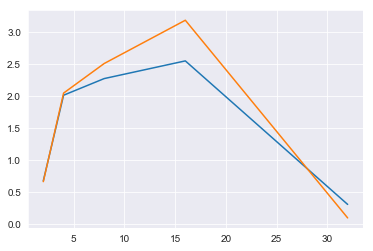

In [65]:
category = [2,4,8,16,32]
sns.lineplot(x=category, y= act_add)
sns.lineplot(x=category, y= act_sub)

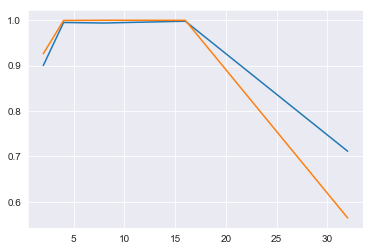

In [62]:
category = [2,4,8,16,32]
sns.lineplot(x=category, y= label_prob_add)
sns.lineplot(x=category, y= label_prob_sub)

In [49]:
act_sub


array([0.6581514, 2.0425024, 2.504952 , 3.1816106, 0.0912202],
      dtype=float32)

OSError: The hardware look-up table (GetDeviceGammaRamp) was unable to be used. If you would like to proceed without look-up table (gamma) changes, you can set the `Window` parameter `gammaErrorPolicy` to `"warn"` or `"ignore"`.